In [1]:
import pandas as pd
import surgeo

In [2]:
import geopandas as gpd
import json 

In [42]:
import matplotlib.pyplot as plt

In [3]:
finance_df = pd.read_csv('../../council_campaign_finance/data/located_data_subset_for_member_chapters.csv')

In [77]:
finance_df['first_name'] = finance_df['NAME'].apply(lambda x: x.split(' ')[1])
finance_df['last_name'] = finance_df['NAME'].apply(lambda x: x.split(' ')[0]).str.replace(',', '')

In [78]:
finance_df.sample(5)

,REFNO,DATE,matched_name,ZIP,latitude,longitude,OCCUPATION,EMPNAME,AMNT,NAME,first_name,last_name
4296,R0004375,1/11/2021,Henry L Butler,11221,40.6907,-73.9274,Retired,NaN,100.0,"Kalokoh, Jacqueline",Jacqueline,Kalokoh
7728,R0000041,11/12/2020,Robert Waterman,11435,40.7029,-73.8111,Dean,NYC Dept of Education,100.0,"Seabrooks, Gerald",Gerald,Seabrooks
1619,R0000420,11/15/2020,Yu Lin,11220,40.6412,-74.0133,Retired,NaN,100.0,"Chen, Yong Guang",Yong,Chen
4762,R0000521,10/19/2020,Robert Waterman,11552,40.6929,-73.6539,Self Employed,Borders Laurent Physician Llc,200.0,"Laurent, Bordes",Bordes,Laurent
6402,R0002315,1/11/2021,Michael D Hollingsworth,11213,40.6700,-73.9367,Unemployed,NaN,25.0,"Norvig, Isabella",Isabella,Norvig


In [79]:
fsg = surgeo.BIFSGModel()

In [80]:
sg = surgeo.SurgeoModel()

In [95]:
f = surgeo.FirstNameModel()

In [ ]:
def find_ethnicity(row):
    result = fsg.get_probabilities(
        pd.Series([row['first_name']]),
        pd.Series([row['last_name']]),
        pd.Series([row['ZIP']])
    )
    numeric_result = result.select_dtypes(include='number')
    predicted_ethnicity = numeric_result.idxmax(axis=1).iloc[0]
    return predicted_ethnicity

In [68]:
def find_ethnicity_sg(row):
    result = sg.get_probabilities(
        pd.Series([row['last_name']]),
        pd.Series([row['ZIP']])
    )
    numeric_result = result.select_dtypes(include='number')
    predicted_ethnicity = numeric_result.idxmax(axis=1).iloc[0]
    return predicted_ethnicity

In [81]:
finance_df['last_name'] = finance_df['last_name'].str.split('-').str[0]

In [82]:
finance_df['ethnicity'] = finance_df.apply(find_ethnicity, axis=1)

In [57]:
fsg.get_probabilities(pd.Series(['shouri']), pd.Series(['zheng']), pd.Series(['11228']))

,zcta5,first_name,surname,white,black,api,native,multiple,hispanic
0,11228,SHOURI,ZHENG,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
finance_df.isnull().sum()

REFNO              0
DATE               1
matched_name       0
ZIP                0
latitude           0
longitude          0
OCCUPATION       501
EMPNAME         2206
AMNT               0
NAME               0
first_name         0
last_name          0
ethnicity       2786
dtype: int64

In [85]:
fr_missing = finance_df[finance_df['ethnicity'].isnull()]

In [86]:
fr_missing['last_name'] = fr_missing['last_name'].str.split('-').str[0]

C:\Users\samtg\AppData\Local\Temp\ipykernel_7296\4134717725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_missing['last_name'] = fr_missing['last_name'].str.split('-').str[0]


In [90]:
fr_missing['ethnicity'] = fr_missing.apply(find_ethnicity_sg, axis=1)

C:\Users\samtg\AppData\Local\Temp\ipykernel_7296\3412879493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_missing['ethnicity'] = fr_missing.apply(find_ethnicity_sg, axis=1)


In [94]:
still_missing = fr_missing[fr_missing['ethnicity'].isnull()]

In [96]:
def find_ethnicity_f(row):
    result = f.get_probabilities(
        pd.Series([row['first_name']]),
    )
    numeric_result = result.select_dtypes(include='number')
    predicted_ethnicity = numeric_result.idxmax(axis=1).iloc[0]
    return predicted_ethnicity

In [97]:
still_missing['ethnicity'] = fr_missing.apply(find_ethnicity_f, axis=1)

C:\Users\samtg\AppData\Local\Temp\ipykernel_7296\1392882880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  still_missing['ethnicity'] = fr_missing.apply(find_ethnicity_f, axis=1)


In [99]:
finance_df.dropna(subset=['ethnicity'], inplace=True)
fr_missing.dropna(subset=['ethnicity'], inplace=True)
still_missing.dropna(subset=['ethnicity'], inplace=True)

C:\Users\samtg\AppData\Local\Temp\ipykernel_7296\848753722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_missing.dropna(subset=['ethnicity'], inplace=True)
C:\Users\samtg\AppData\Local\Temp\ipykernel_7296\848753722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  still_missing.dropna(subset=['ethnicity'], inplace=True)


In [100]:
finance_df = pd.concat([finance_df, fr_missing, still_missing])

In [14]:
nyc_zip = gpd.read_file('../data/Modified Zip Code Tabulation Areas (MODZCTA).geojson')

In [15]:
zip_list = nyc_zip['zcta'].astype(str).str.split(', ').explode().tolist()

In [111]:
zip_list

['10001',
 '10119',
 '10199',
 '10002',
 '10003',
 '10026',
 '10004',
 '10005',
 '10271',
 '10006',
 '10007',
 '10278',
 '10279',
 '10009',
 '10010',
 '10011',
 '10012',
 '10013',
 '10014',
 '10016',
 '10017',
 '10165',
 '10167',
 '10168',
 '10169',
 '10170',
 '10171',
 '10172',
 '10173',
 '10174',
 '10177',
 '10018',
 '10030',
 '10019',
 '10020',
 '10103',
 '10111',
 '10112',
 '10021',
 '10022',
 '10152',
 '10153',
 '10154',
 '10023',
 '10024',
 '10025',
 '10027',
 '10115',
 '10028',
 '10029',
 '10031',
 '10032',
 '10033',
 '10034',
 '10037',
 '10035',
 '10036',
 '10110',
 '10038',
 '10040',
 '11104',
 '11105',
 '10039',
 '10128',
 '10044',
 '10065',
 '10069',
 '10075',
 '10162',
 '10280',
 '10282',
 '10301',
 '11106',
 '10302',
 '10303',
 '10304',
 '10451',
 '10305',
 '10306',
 '10307',
 '10308',
 '10309',
 '10310',
 '10312',
 '10311',
 '10314',
 '10456',
 '10452',
 '10453',
 '10454',
 '10455',
 '10457',
 '10458',
 '10459',
 '10460',
 '10461',
 '11004',
 '11005',
 '11040',
 '11101',


In [ ]:
finance_df['in_nyc'] = finance_df['ZIP'].astype(str).isin(zip_list).astype(int)

In [125]:
finance_df.groupby('matched_name')['in_nyc'].mean()

matched_name
Alexa Aviles               0.802225
Chi Osse                   0.781440
Crystal Hudson             0.827247
Henry L Butler             0.955947
Jacqueline Painter         0.868644
Michael D Hollingsworth    0.843060
Reginald Swiney            0.920000
Robert Waterman            0.874659
Rodrigo Camarena           0.810093
Tahirah A Moore            0.893443
Yu Lin                     0.973301
Name: in_nyc, dtype: float64

In [93]:
finance_df.groupby('matched_name')['AMNT'].count()

matched_name
Alexa Aviles               1660
Chi Osse                   1204
Crystal Hudson             1467
Henry L Butler              470
Jacqueline Painter          490
Michael D Hollingsworth    2091
Reginald Swiney              25
Robert Waterman             387
Rodrigo Camarena            777
Tahirah A Moore             511
Yu Lin                      415
Name: AMNT, dtype: int64

In [127]:
finance_df.groupby('matched_name')['AMNT'].mean()

matched_name
Alexa Aviles                45.204487
Chi Osse                    48.663487
Crystal Hudson              82.366306
Henry L Butler              95.345815
Jacqueline Painter          43.487436
Michael D Hollingsworth     38.713173
Reginald Swiney            108.400000
Robert Waterman            105.212534
Rodrigo Camarena            47.120850
Tahirah A Moore             86.891393
Yu Lin                     101.344684
Name: AMNT, dtype: float64

In [5]:
thirty_five = ["Michael D Hollingsworth",'Crystal Hudson']

In [123]:
finance_with_ethnicity = finance_df.copy()

In [126]:
finance_with_ethnicity.to_csv('../data/finance_with_ethnicity.csv',index=False)

In [4]:
fwe = pd.read_csv('../data/finance_with_ethnicity.csv')

In [6]:
thirty_five_df = fwe[fwe['matched_name'].isin(thirty_five)]

In [10]:
by_zip_35 = thirty_five_df.groupby(['matched_name','ZIP'])['AMNT'].sum().reset_index()

In [39]:
by_zip_35['ZIP'] = by_zip_35['ZIP'].astype(str)

In [98]:
by_zip_35.sort_values('AMNT',ascending=False)

,matched_name,ZIP,AMNT
144,Crystal Hudson,11238,21968.00
436,Michael D Hollingsworth,11238,12979.99
127,Crystal Hudson,11217,9138.00
418,Michael D Hollingsworth,11216,7428.34
427,Michael D Hollingsworth,11225,7405.13
...,...,...,...
522,Michael D Hollingsworth,33016,1.00
529,Michael D Hollingsworth,46208,1.00
10,Crystal Hudson,6606,0.00
75,Crystal Hudson,10312,0.00


In [100]:
compare = by_zip_35.pivot(index='ZIP',columns='matched_name',values='AMNT').fillna(0).reset_index()
compare_nyc = compare[compare['ZIP'].isin(zip_list)]
compare_nyc['dif'] = compare_nyc['Crystal Hudson'] - compare_nyc['Michael D Hollingsworth']
compare_nyc.sort_values('dif',ascending=True).head(10)

C:\Users\samtg\AppData\Local\Temp\ipykernel_3376\1318463283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_nyc['dif'] = compare_nyc['Crystal Hudson'] - compare_nyc['Michael D Hollingsworth']


matched_name,ZIP,Crystal Hudson,Michael D Hollingsworth,dif
124,11225,1984.00,7405.13,-5421.13
115,11216,3445.00,7428.34,-3983.34
10,10014,385.00,1562.57,-1177.57
135,11237,165.00,1087.76,-922.76
131,11233,975.00,1782.86,-807.86
113,11213,2065.17,2802.00,-736.83
121,11222,490.00,1223.03,-733.03
128,11230,90.00,641.00,-551.00
151,11385,360.00,845.00,-485.00
160,11434,0.00,450.00,-450.00


In [44]:
zip_map = compare_nyc.merge(nyc_zip, left_on='ZIP', right_on='zcta', how='left')
zip_map = gpd.GeoDataFrame(zip_map)

In [53]:
big_dif= ['11225','	11216','10014','11237','11233',	'11238','11217','11215','10021','11106'	]

In [94]:

brooklyn_zips =   [11201, 11203, 11204, 11205, 11206,
11207,
    11208,
    11209,
    11210,
    11211,
    11212,
    11213,
    11214,
    11215,
    11216,
    11217,
    11218,
    11219,
    11220,
    11221,
    11222,
    11223,
    11224,
    11225,
    11226,
    11228,
    11229,
    11230,
    11231,
    11232,
    11233,
    11234,
    11235,
    11236,
    11237,
    11238,
    11239,
    11241,
    11243,
    11249
]

In [95]:
brooklyn_zips = [str(x) for x in brooklyn_zips]

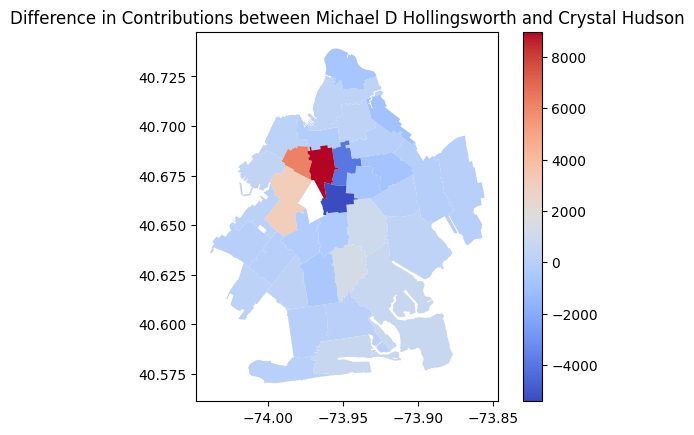

In [60]:
brooklyn_map = zip_map[zip_map['ZIP'].isin(brooklyn_zips)]
brooklyn_map.plot(column='dif', cmap='coolwarm', legend=True)
plt.title('Difference in Contributions between Michael D Hollingsworth and Crystal Hudson')
plt.show()

In [68]:
by_eth_sum = thirty_five_df.groupby(['matched_name','ethnicity'])['AMNT'].sum().reset_index().sort_values('AMNT',ascending=False)
by_eth_sum['total_cand'] = by_eth_sum.groupby('matched_name')['AMNT'].transform('sum')
by_eth_sum['pct'] = by_eth_sum['AMNT'] / by_eth_sum['total_cand'] * 100

In [69]:
by_eth_sum

,matched_name,ethnicity,AMNT,total_cand,pct
4,Crystal Hudson,white,76477.45,117289.62,65.203937
8,Michael D Hollingsworth,white,60020.59,78936.16,76.036876
1,Crystal Hudson,black,23338.17,117289.62,19.897899
6,Michael D Hollingsworth,black,13645.82,78936.16,17.287160
0,Crystal Hudson,api,10399.00,117289.62,8.866087
2,Crystal Hudson,hispanic,6950.00,117289.62,5.925503
5,Michael D Hollingsworth,api,3397.97,78936.16,4.304706
7,Michael D Hollingsworth,hispanic,1871.78,78936.16,2.371258
3,Crystal Hudson,multiple,125.00,117289.62,0.106574


expenses

In [71]:
expenses_hudson = pd.read_csv('../data/hudson.csv')
expenses_hollingsworth = pd.read_csv('../data/holingsworth.csv')

In [92]:
expenses_hudson[expenses_hudson['PURPOSECD'] == 'TVADS'][['DATE','PURPOSECD','PURPOSE','EXPLAIN','AMNT']]

,DATE,PURPOSECD,PURPOSE,EXPLAIN,AMNT
343,6/8/2021,TVADS,Television Ads.,"Hulu, amazon, stream",6500.0


In [75]:
expenses_hudson.groupby('PURPOSECD')['AMNT'].sum().sort_values(ascending=False)

PURPOSECD
CMAIL    108836.50
WAGES     95759.45
CONSL     59880.91
OTHER     28803.00
LITER     20580.07
PROFL     20561.34
TVADS      6500.00
POSTA      2633.51
ADVAN      1532.51
OFFCE       784.20
PETIT       408.28
FUNDR         8.00
Name: AMNT, dtype: float64

In [74]:
expenses_hollingsworth.groupby('PURPOSECD')['AMNT'].sum().sort_values(ascending=False)

PURPOSECD
LITER    64138.14
WAGES    54379.63
CMAIL    42034.64
INTER    18683.85
OTHER    11667.35
PROFL     8226.45
RENTO     6300.00
FUNDR     5545.87
OFFCE     2384.64
PETIT     1256.86
Name: AMNT, dtype: float64

In [109]:
expenses_hudson[expenses_hudson['EXPLAIN'].str.lower().str.contains('ad')][['DATE','PURPOSECD','PURPOSE','EXPLAIN','AMNT']]

,DATE,PURPOSECD,PURPOSE,EXPLAIN,AMNT
16,7/11/2021,ADVAN,Advance Repaymnt,Advance Repayment,1300.00
122,6/25/2021,OTHER,Other: explntion,legal advice,6000.00
123,1/7/2021,CONSL,Campgn Consuls.,legal advice,7000.00
130,9/18/2020,OTHER,Other: explntion,NYVAN AD57voter file,2000.00
131,1/9/2021,OTHER,Other: explntion,NYVAN AD57voter file,3500.00
143,6/19/2021,PROFL,Prof. Srvcs.,text msg service ads,163.31
144,7/19/2021,PROFL,Prof. Srvcs.,text msg service ads,163.31
145,8/20/2021,PROFL,Prof. Srvcs.,text msg service ads,163.31
146,9/19/2021,PROFL,Prof. Srvcs.,text msg service ads,163.31
147,2/22/2021,PROFL,Prof. Srvcs.,text msg service ads,163.31


In [105]:
expenses_hollingsworth[expenses_hollingsworth['EXPLAIN'].str.lower().str.contains('ad')][['PURPOSE','EXPLAIN','AMNT']]

,PURPOSE,EXPLAIN,AMNT
98,Interest Expns.,Online advertising,900.00
99,Interest Expns.,Online advertising,900.00
100,Interest Expns.,Online advertising,900.00
101,Interest Expns.,Online advertising,900.00
102,Interest Expns.,Online advertising,900.00
103,Interest Expns.,Online advertising,900.00
104,Interest Expns.,Online advertising,900.00
105,Interest Expns.,Online advertising,900.00
106,Interest Expns.,Online advertising,165.91
107,Interest Expns.,Online advertising,46.04
